## Sudoku Solver - Build CNN Model
*** 

**Tensorflows MNIST** dataset used to build a model to predict the number from the image of individual boxes in Sudoku Puzzle. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.



In [1]:
# Import necessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Load dataset to as train and test split

(X_train, y_train), (X_test, y_test) = mnist.load_data()

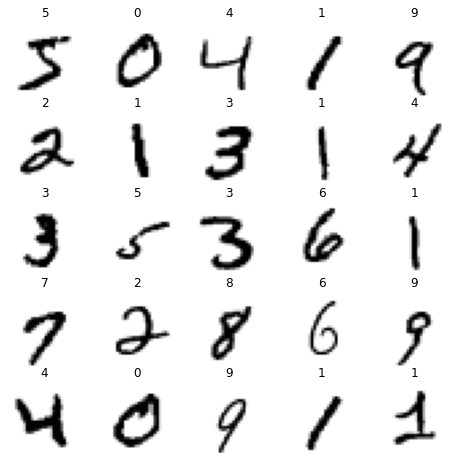

In [3]:
# display sample images from the datasets

plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [4]:
# display the shape of the datasets

print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


In [5]:
# Reshape the train and test datasets compatible with CNN model - (Using CNN model for this case)
# shape of the dataset would be number of samples * height * width * number of channels (= 1 for grayscale images)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# display the shape of reshaped of the datasets
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')

X_train shape : (60000, 28, 28, 1)
X_test shape : (10000, 28, 28, 1)


In [6]:
# Normalize the train and test dataset

X_train = X_train / 255
X_test = X_test / 255

In [7]:
# convert the y_train and y_test to categorical features.
# The size of the dataset will be changed to number of samples * 10 (0-9 digits)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

y_train shape : (60000, 10)
y_test shape : (10000, 10)


In [8]:
# Build model
# Sequentail model with two Conv2D layers followed by two hidden layers and a output layer

model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28,1 ), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          4

In [9]:
# Train the model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 45s 150ms/step - loss: 0.8484 - accuracy: 0.7171 - val_loss: 0.2033 - val_accuracy: 0.9413
Epoch 2/10
300/300 [==============================] - 46s 154ms/step - loss: 0.3405 - accuracy: 0.8905 - val_loss: 0.1192 - val_accuracy: 0.9645
Epoch 3/10
300/300 [==============================] - 46s 154ms/step - loss: 0.2597 - accuracy: 0.9179 - val_loss: 0.0853 - val_accuracy: 0.9757
Epoch 4/10
300/300 [==============================] - 46s 152ms/step - loss: 0.2113 - accuracy: 0.9319 - val_loss: 0.0758 - val_accuracy: 0.9774
Epoch 5/10
300/300 [==============================] - 46s 153ms/step - loss: 0.1851 - accuracy: 0.9413 - val_loss: 0.0671 - val_accuracy: 0.9798
Epoch 6/10
300/300 [==============================] - 47s 157ms/step - loss: 0.1660 - accuracy: 0.9478 - val_loss: 0.0632 - val_accuracy: 0.9818
Epoch 7/10
300/300 [==============================] - 47s 155ms/step - loss: 0.1568 - accuracy: 0.9512 - val_loss: 0.0633 - val_ac

In [10]:
# Evaluate the accuracy

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc}')

313/313 - 2s - loss: 0.0430 - accuracy: 0.9882
Test accuracy : 0.9882000088691711


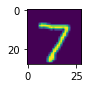

Predicted number: 7


In [11]:
# Test the model

plt.figure(figsize=(1, 1))
plt.imshow(X_test[0].reshape(28, 28))
plt.show()

digit = np.argmax(model.predict(X_test[0].reshape(1, 28, 28, 1)))

print('============================')
print(f'Predicted number: { digit }')
print('============================')

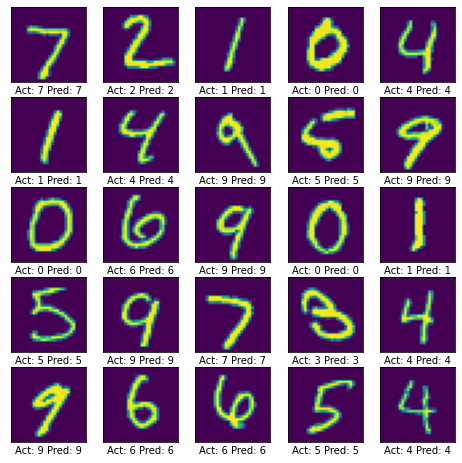

In [12]:
plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.xlabel(f'Act: {np.argmax(y_test[i])} Pred: {np.argmax(model.predict(X_test[i].reshape(1, 28, 28, 1)))}')
plt.show()

In [13]:
# Save the model
# serialize model to JSON

model_json = model.to_json()
with open('model/model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('model/model.h5')

print('Saved model to disk')

Saved model to disk
